## CSc 8830: Computer Vision - Assignment 3

1. Capture a 10 sec video footage using a camera of your choice. The footage should be taken with the camera in hand and you need to pan the camera slightly from left-right or right-left during the 10 sec duration. Pick any image frame from the 10 sec video footage. Pick a region of interest corresponding to an object in the image. Crop this region from the image. Then use this cropped region to compare with randomly picked 10 images in the dataset of 10 sec video frames, to see if there is a match for the object in the scenes from the 10 images. For comparison use sum of squared differences (SSD) or normalized correlation. 

    A 10 sec video has been taken from a mobile phone camera

Select ROI by clicking and dragging the mouse. Press 'q' to finish the selection.
ROI Selected...


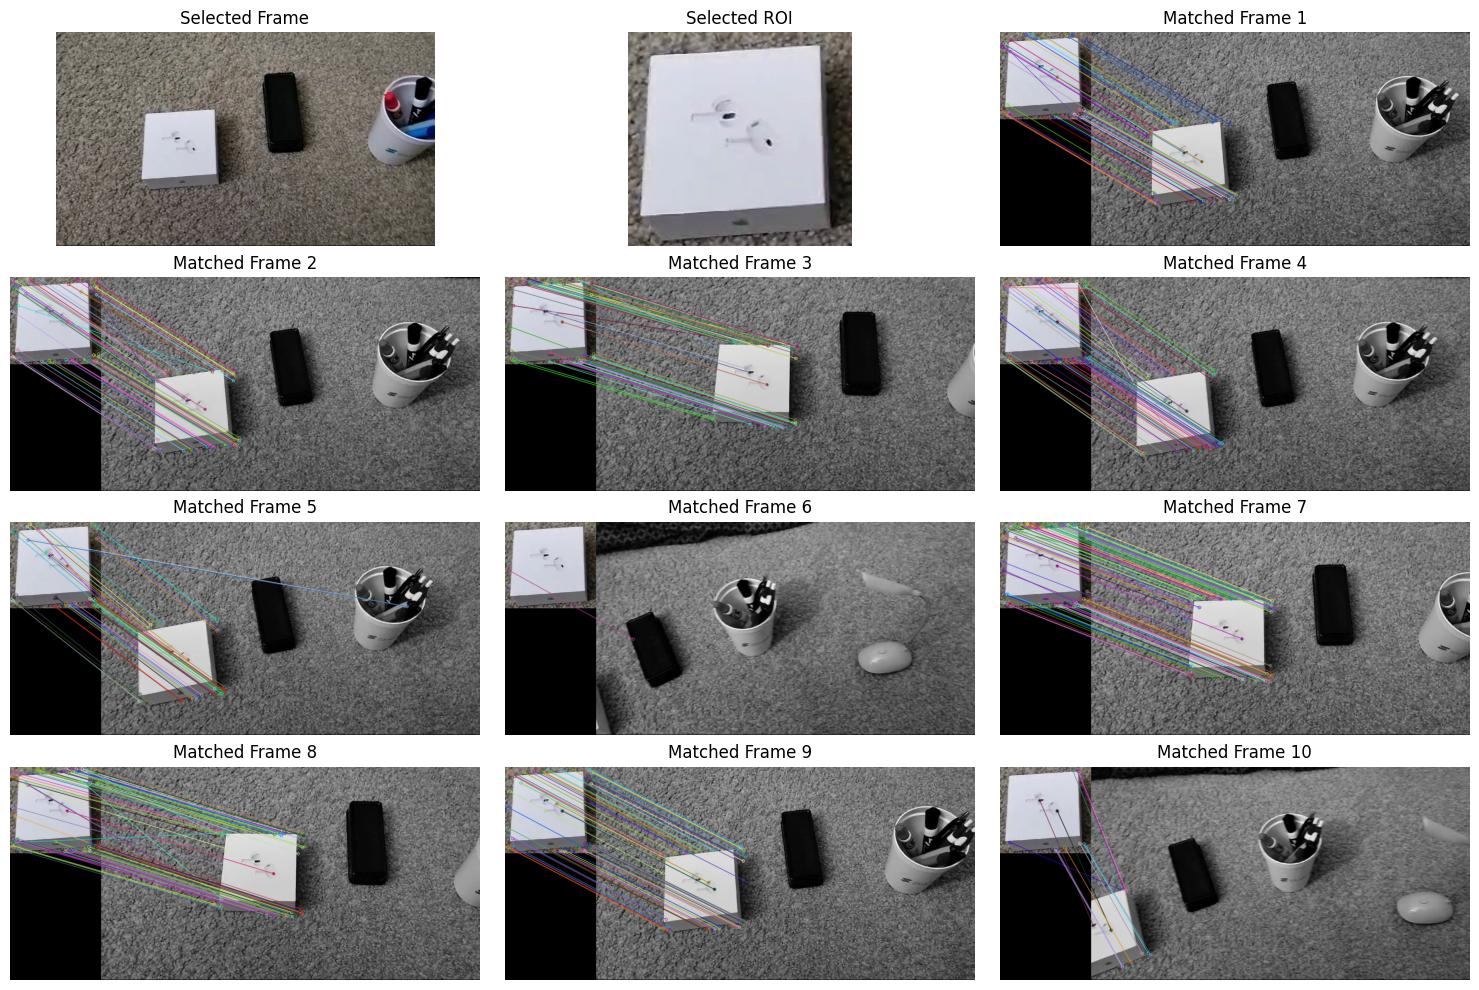

In [33]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to perform object detection using feature-based matching with SIFT
def object_detection_sift(selected_frame, selected_roi, frames, roi_size=100):
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors for selected ROI
    kp1, des1 = sift.detectAndCompute(selected_roi, None)

    # Initialize list to store matched frames
    matched_frames = []

    # Loop through frames for object detection
    for frame in frames:
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors for the frame
        kp2, des2 = sift.detectAndCompute(gray_frame, None)

        # Perform feature matching
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply ratio test
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        # Draw matches
        matched_frame = cv2.drawMatches(selected_roi, kp1, gray_frame, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Append matched frame to the list
        matched_frames.append(matched_frame)

    return matched_frames

# Mouse callback function to select ROI
def select_roi(event, x, y, flags, param):
    global roi_x, roi_y, roi_width, roi_height, selecting_roi

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_x, roi_y = x, y
        selecting_roi = True
    elif event == cv2.EVENT_MOUSEMOVE and selecting_roi:
        roi_width, roi_height = x - roi_x, y - roi_y
    elif event == cv2.EVENT_LBUTTONUP:
        roi_width, roi_height = x - roi_x, y - roi_y
        selecting_roi = False

# Load the original video
original_video = cv2.VideoCapture('cv-10s_video_ass2.mp4')

# Read a random frame from the video
total_frames = int(original_video.get(cv2.CAP_PROP_FRAME_COUNT))
frame_number = random.randint(0, total_frames)
original_video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, selected_frame = original_video.read()

# Create a window to select ROI
window_name = 'Select ROI (Press "q" to complete selection & quit)'
cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name, select_roi)

# Select ROI
print("Select ROI by clicking and dragging the mouse. Press 'q' to finish the selection.")
while True:
    clone = selected_frame.copy()
    if not selecting_roi and roi_width > 0 and roi_height > 0:
        cv2.rectangle(clone, (roi_x, roi_y), (roi_x+roi_width, roi_y+roi_height), (0, 255, 0), 2)
    cv2.imshow(window_name, clone)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        print("ROI Selected...")
        break

# Define ROI
selected_roi = selected_frame[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

# Load 10 random frames from the video
random_frame_indices = random.sample(range(total_frames), 10)
frames = []
for index in random_frame_indices:
    original_video.set(cv2.CAP_PROP_POS_FRAMES, index)
    ret, frame = original_video.read()
    frames.append(frame)

# Perform object detection with SIFT
matched_frames = object_detection_sift(selected_frame, selected_roi, frames)

# Display the frame, selected ROI, and matched object in a grid using matplotlib
plt.figure(figsize=(15, 10))
plt.subplot(4, 3, 1)
plt.imshow(cv2.cvtColor(selected_frame, cv2.COLOR_BGR2RGB))
plt.title('Selected Frame')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(cv2.cvtColor(selected_roi, cv2.COLOR_BGR2RGB))
plt.title('Selected ROI')
plt.axis('off')

for i, matched_frame in enumerate(matched_frames):
    plt.subplot(4, 3, i+3)
    plt.imshow(cv2.cvtColor(matched_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Matched Frame {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Release video capture
original_video.release()


2. Solve the following by hand (on paper or typed: Do not just copy it from literature)
 
    (a) Derive the motion tracking equation from fundamental principles. Select any 2 consecutive frames from the set from problem 1 and compute the motion function estimates.
     
    (b). Derive the procedure for performing Lucas-Kanade algorithm for motion tracking when the motion is known to be affine: u(x,y) = a1*x + b1*y + c1; v(x,y) = a2*x + b2*y + c2 (the numbers are subscripts, not power) 

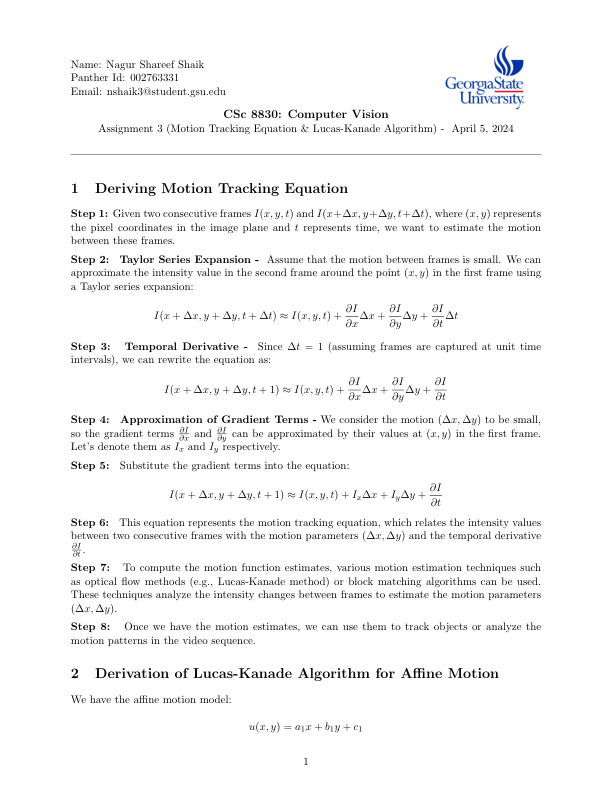

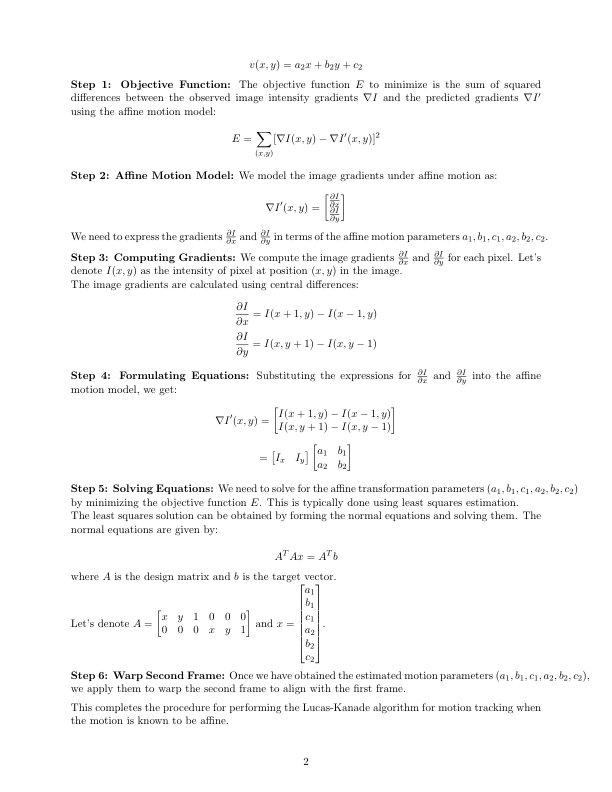

/Users/nagurshareefshaik/Desktop/MSCS/Spring 2024/CV/Nagur Shareef Shaik/Assignment-3/Assignment 3 - Q2.pdf

In [23]:
#!pip install pymupdf
import fitz  # PyMuPDF
from IPython.display import display, Image, FileLink

def render_pdf_page(pdf_path, page_number):
    # Open the PDF
    pdf_document = fitz.open(pdf_path)

    # Select the desired page
    page = pdf_document.load_page(page_number - 1)

    # Render the page as an image (PNG)
    pix = page.get_pixmap()

    # Display the image in the notebook
    display(Image(data=pix.tobytes(), format='png'))

pdf_path = 'Assignment 3 - Q2.pdf'

# Specify the page number you want to render
page_number = 1
render_pdf_page(pdf_path, page_number)

# Specify the page number you want to render
page_number = 2
render_pdf_page(pdf_path, page_number)

display(FileLink(pdf_path))


3. Fix a marker on a wall or a flat vertical surface. From a distance D, keeping the camera stationed static (not handheld and mounted on a tripod or placed on a flat surface), capture an image such that the marker is registered. Then translate the camera by T units along the axis parallel to the ground (horizontal) and then capture another image, with the marker being registered. Compute D using disparity based depth estimation in stereo-vision theory. (Note: you can pick any value for D and T. Keep in mind that T cannot be large as the marker may get out of view. Of course this depends on D)

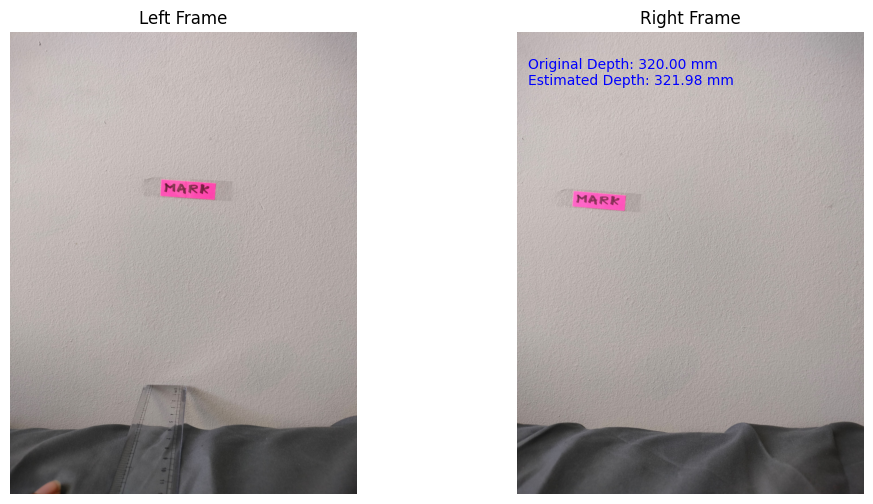

Original distance D: 320.0 mm
Estimated distance D: 321.98240319726756 mm


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the stereo images
image_left = cv2.imread('frame-1.jpeg')
image_right = cv2.imread('frame-2.jpeg')

# Convert images to grayscale
gray_left = cv2.cvtColor(image_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(image_right, cv2.COLOR_BGR2GRAY)

# Create a StereoSGBM object
stereo = cv2.StereoSGBM_create(numDisparities=16, blockSize=15)

# Compute disparity map
disparity = stereo.compute(gray_left, gray_right)

# Calculate distance D
focal_length = 35  # focal length in horizontal field view
T = 90  # Translation between the cameras in mm
disparity_value = np.mean(disparity)  # Mean disparity value
D = (focal_length * T) / disparity_value
O = 32.0 # Original ditance in cm

# Plot the images
plt.figure(figsize=(12, 6))

# Plot the left image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB))
plt.title('Left Frame')
plt.axis('off')

# Plot the right image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_right, cv2.COLOR_BGR2RGB))
plt.title('Right Frame')
plt.axis('off')

# Annotate the estimated depth
plt.text(100, 475, f"Original Depth: {O*10:.2f} mm\nEstimated Depth: {D*10:.2f} mm", color='blue')

plt.show()

print("Original distance D:", O*10, "mm")
print("Estimated distance D:", D*10, "mm")

4. For the video (problem 1) you have taken, plot the optical flow vectors on each frame using MATLAB’s (Python) optical flow codes. 

    (i) treating every previous frame as a reference frame 

    (ii) treating every 11th frame as a reference frame 
    
    (iii) treating every 31st frame as a reference frame 

**Below is the Python Solution, It is also solved using Matlab**

In [29]:
import cv2

# Read the video file
video_file = "cv-10s_video_ass2.mp4"
cap = cv2.VideoCapture(video_file)

# Parameters for reference frames
reference_frames = [1, 11, 31]

# Optical flow parameters
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Color for displaying optical flow
color = (0, 255, 0)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('q4_optical_flow_output.mp4', fourcc, 25.0, (int(cap.get(3)), int(cap.get(4))))

# Read the first frame
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Loop over the reference frames
    for ref_frame in reference_frames:
        if ref_frame == 1 or cap.get(cv2.CAP_PROP_POS_FRAMES) % ref_frame == 0:
            # Calculate optical flow
            flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

            # Plot optical flow vectors
            for y in range(0, frame.shape[0], 10):
                for x in range(0, frame.shape[1], 10):
                    dx, dy = flow[y, x]
                    cv2.line(frame, (x, y), (int(x + dx), int(y + dy)), color, 1)
    
    # Write the frame to the output video
    out.write(frame)
    
    # Update previous frame
    prev_gray = gray.copy()

# Release video capture and writer
cap.release()
out.release()

5. Run the feature-based matching object detection on the images from problem (1). MATLAB (not mandatory for this problem) Tutorial for feature-based matching object detection is available here: 
https://www.mathworks.com/help/vision/ug/object-detection-in-a-cluttered-scene-using-point-feature-matching.html 

Select ROI by clicking and dragging the mouse. Press 'q' to finish the selection.
ROI Selected...


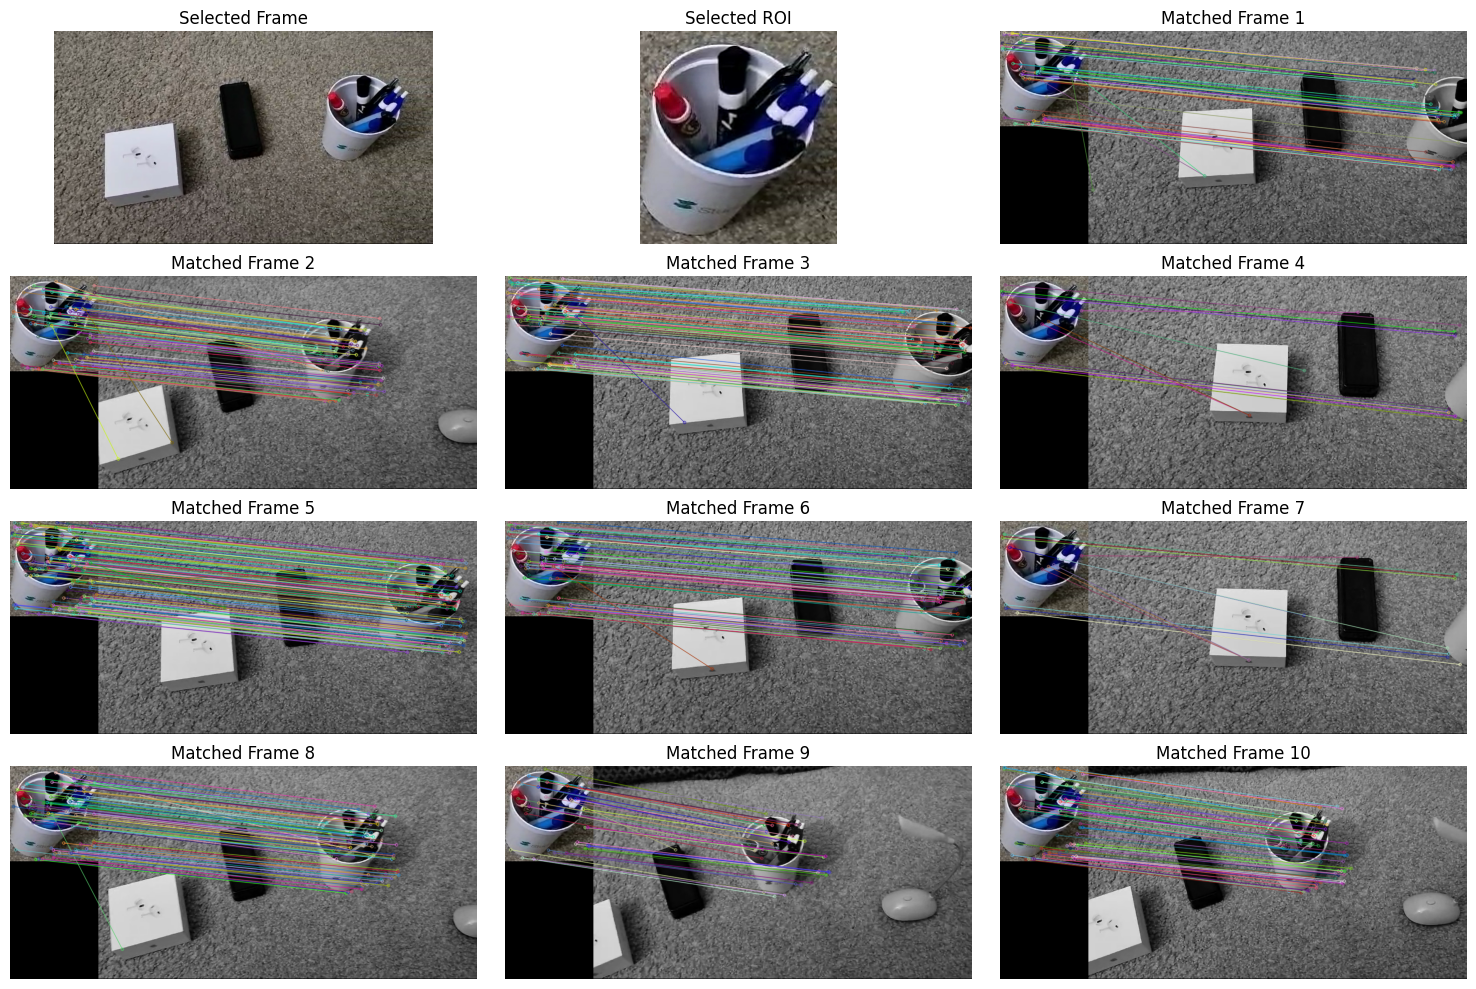

In [42]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to perform object detection using feature-based matching with SIFT
def object_detection_sift(selected_frame, selected_roi, frames, roi_size=100):
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors for selected ROI
    kp1, des1 = sift.detectAndCompute(selected_roi, None)

    # Initialize list to store matched frames
    matched_frames = []

    # Loop through frames for object detection
    for frame in frames:
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors for the frame
        kp2, des2 = sift.detectAndCompute(gray_frame, None)

        # Perform feature matching
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply ratio test
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        # Draw matches
        matched_frame = cv2.drawMatches(selected_roi, kp1, gray_frame, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Append matched frame to the list
        matched_frames.append(matched_frame)

    return matched_frames

# Mouse callback function to select ROI
def select_roi(event, x, y, flags, param):
    global roi_x, roi_y, roi_width, roi_height, selecting_roi

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_x, roi_y = x, y
        selecting_roi = True
    elif event == cv2.EVENT_MOUSEMOVE and selecting_roi:
        roi_width, roi_height = x - roi_x, y - roi_y
    elif event == cv2.EVENT_LBUTTONUP:
        roi_width, roi_height = x - roi_x, y - roi_y
        selecting_roi = False

# Load the original video
original_video = cv2.VideoCapture('cv-10s_video_ass2.mp4')

# Read a random frame from the video
total_frames = int(original_video.get(cv2.CAP_PROP_FRAME_COUNT))
frame_number = random.randint(0, total_frames)
original_video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, selected_frame = original_video.read()

# Select ROI
print("Select ROI by clicking and dragging the mouse. Press 'q' to finish the selection.")
while True:
    clone = selected_frame.copy()
    if not selecting_roi and roi_width > 0 and roi_height > 0:
        cv2.rectangle(clone, (roi_x, roi_y), (roi_x+roi_width, roi_y+roi_height), (0, 255, 0), 2)
    cv2.imshow(window_name, clone)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        print("ROI Selected...")
        break

# Define ROI
selected_roi = selected_frame[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

# # Select ROI
# roi_x, roi_y, roi_width, roi_height = cv2.selectROI('Select ROI', selected_frame)
# selected_roi = selected_frame[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

# Load 10 random frames from the video
random_frame_indices = random.sample(range(total_frames), 10)
frames = []
for index in random_frame_indices:
    original_video.set(cv2.CAP_PROP_POS_FRAMES, index)
    ret, frame = original_video.read()
    frames.append(frame)

# Perform object detection with SIFT
matched_frames = object_detection_sift(selected_frame, selected_roi, frames)

# Display the frame, selected ROI, and matched object in a grid using matplotlib
plt.figure(figsize=(15, 10))
plt.subplot(4, 3, 1)
plt.imshow(cv2.cvtColor(selected_frame, cv2.COLOR_BGR2RGB))
plt.title('Selected Frame')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(cv2.cvtColor(selected_roi, cv2.COLOR_BGR2RGB))
plt.title('Selected ROI')
plt.axis('off')

for i, matched_frame in enumerate(matched_frames):
    plt.subplot(4, 3, i+3)
    plt.imshow(cv2.cvtColor(matched_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Matched Frame {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Release video capture
original_video.release()


6. Refer to the Bag of Features example MATLAB source code provided in the classroom’s classwork page. In your homework, pick an object category that would be commonly seen in any household (e.g. cutlery) and pick 5 object types (e.g. for cutlery pick spoon, fork, butter knife, cutting knife, ladle). Present your performance evaluation. 

7. Repeat the image capture experiment from problem (3), however, now also rotate (along the ground plane) the camera 2 (right camera) towards camera 1 position, after translation by T. Make sure the marker is within view. Note down the rotation angle. Run the tutorial provided for uncalibrated stereo rectification in here: https://www.mathworks.com/help/vision/ug/uncalibrated-stereo-image-rectification.html (MATLAB is mandatory for this exercise). Exercise this tutorial for the image pairs you have captured. You can make assumptions as necessary, however, justify them in your answers/description. (Note: you can print out protractors from any online source and place your cameras on that when running experiments: http://www.ossmann.com/protractor/conventional-protractor.pdf). 

**Above Questions were answered using Matlab**

8. Implement a real-time object tracker (two versions) that (i) uses a marker (e.g. QR code or April tags), and (ii) does not use any marker and only relies on the object

##### Object Tracking with Marker (QR Code)

In [13]:
# Lets create some QR Codes
#!pip install qrcode
import qrcode

object_list = ["Mobile Phone", "Box", "Toy", "Laptop", "Chair", "Cup", "Book", "Sticky Note"]
qr_dir = "QRCodes/"
for object in object_list:
    code = qrcode.make(object)
    code.save(qr_dir+object+"QR.jpg")

In [16]:
import cv2

camera_id = 0
delay = 1
window_name = 'Object Tracking through QR Code'

qcd = cv2.QRCodeDetector()
cap = cv2.VideoCapture(camera_id)

while True:
    ret, frame = cap.read()

    if ret:
        ret_qr, decoded_info, points, _ = qcd.detectAndDecodeMulti(frame)
        if ret_qr:
            for s, p in zip(decoded_info, points):
                if s:
                    #print(s)
                    # Draw rectangle
                    frame = cv2.polylines(frame, [p.astype(int)], True, (0, 255, 0), 8)
                    # Add text
                    cv2.putText(frame, s, (int(p[0][0]), int(p[0][1])-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                else:
                    color = (0, 0, 255)
                    frame = cv2.polylines(frame, [p.astype(int)], True, color, 8)
        cv2.imshow(window_name, frame)

    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break

cv2.destroyWindow(window_name)


##### Object Tracking without Marker

In [3]:
import cv2
import math

class ObjectTracker:
    def __init__(self):
        # Dictionary to store the center points of the tracked objects
        self.object_centers = {}
        # Counter to keep track of object IDs
        self.object_id_count = 0

    def update(self, object_rectangles):
        # List to store object bounding boxes and IDs
        tracked_objects = []

        # Update center points of existing objects or assign new IDs
        for rect in object_rectangles:
            x, y, w, h = rect
            cx = (x + x + w) // 2
            cy = (y + y + h) // 2

            # Check if the object was detected previously
            object_detected = False
            for obj_id, center in self.object_centers.items():
                dist = math.hypot(cx - center[0], cy - center[1])

                # If distance is within a threshold, update center and ID
                if dist < 25:
                    self.object_centers[obj_id] = (cx, cy)
                    tracked_objects.append([x, y, w, h, obj_id])
                    object_detected = True
                    break

            # If new object detected, assign a new ID
            if not object_detected:
                self.object_centers[self.object_id_count] = (cx, cy)
                tracked_objects.append([x, y, w, h, self.object_id_count])
                self.object_id_count += 1

        # Clean up dictionary by removing unused IDs
        new_object_centers = {}
        for obj_bb_id in tracked_objects:
            _, _, _, _, obj_id = obj_bb_id
            center = self.object_centers[obj_id]
            new_object_centers[obj_id] = center

        # Update dictionary with used IDs
        self.object_centers = new_object_centers.copy()
        return tracked_objects

# Create object tracker instance
tracker = ObjectTracker()

# Capture video from file
cap = cv2.VideoCapture("highway.mp4")

# Background subtractor for object detection
object_detector = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=40)

while True:
    ret, frame = cap.read()
    height, width, _ = frame.shape

    # Extract Region of Interest (ROI)
    roi = frame[340: 720,500: 800]

    # 1. Object Detection
    mask = object_detector.apply(roi)
    _, mask = cv2.threshold(mask, 254, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detections = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 100:
            x, y, w, h = cv2.boundingRect(cnt)
            detections.append([x, y, w, h])

    # 2. Object Tracking
    tracked_boxes_ids = tracker.update(detections)
    for box_id in tracked_boxes_ids:
        x, y, w, h, obj_id = box_id
        cv2.putText(roi, str(obj_id), (x, y - 15), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)
        cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Display frames and masks
    cv2.imshow("roi", roi)
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)

    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()
